In [1]:
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
link = requests.get('https://infotables.ru/statistika/31-rossijskaya-federatsiya/944-kolichestvo-prestuplenij-v-rossii')
soup = bs(link.text,"lxml")
#Receive a table
row_table = soup.find_all(class_ = "tables1")[2]
required_table = row_table.find_all("td")[15:]


arr = []
sub_arr = []
big_arr = []

for numb, i in enumerate(required_table):
    #print(i.text.strip(),counter)
    arr.append(i.text.strip())
counter = 0 
for i in arr:
    if i == '—':
        i = 0
    elif i.isdigit():
        sub_arr.append(int(i))
    else:
        #In this section we need to change some names so that they are  equel to names in another dataset
        if i[0] == 'г' and i[1] == '.':
            i = i[3:]
        if 'Республика' in i and i[0:10]== 'Республика':
            i = i[11:]
        if 'Респ.' in i:
            i = i[:-6]
 
        sub_arr.append(i)
    counter += 1
    if counter == 7:
        counter = 0
        big_arr.append(sub_arr)
        sub_arr = []
    
#Create a dataFrame of criminal a years
df = pd.DataFrame(big_arr, columns=['city_name', '2011', '2014', '2015', '2017', '2018', '2019'], )

#We need to drop federal regions
df = df[df["city_name"].str.contains("ФО") == False]

##At the end, we get a table with data on the number of crimes in each required year
df.sort_values('2019')
pd.set_option('display.max_rows', df.shape[0]+1)
df_city_list = df['city_name']



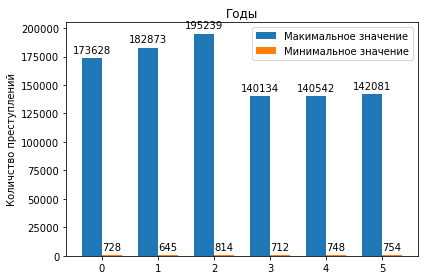

In [3]:
#Illustrating


labels1 = ['2','2','43','43','43','125']

x = np.arange(len(labels1))  # the label locations
width = 0.35  # the width of the bars

maxes1 = [df.sort_values('2011')['2011'].max(), df.sort_values('2014')['2014'].max(), df.sort_values('2015')['2015'].max(),
         df.sort_values('2017')['2017'].max(),df.sort_values('2018')['2018'].max(),df.sort_values('2019')['2019'].max()]
minimums1 = [df.sort_values('2011')['2011'].min(), df.sort_values('2014')['2014'].min(), df.sort_values('2015')['2015'].min(),
         df.sort_values('2017')['2017'].min(),df.sort_values('2018')['2018'].min(),df.sort_values('2019')['2019'].min()]

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, maxes1, width, label='Макимальное значение')
rects2 = ax.bar(x + width/2, minimums1, width, label='Минимальное значение')

ax.set_ylabel('Количство преступлений')
ax.set_title('Годы')


ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


#Add a data frame including information about population

In [4]:
df_years = pd.read_csv('population_size.csv' )
df_years.columns = ['year','city_name','population']

In [5]:
#Create tables with population in different years
df_2011 = df_years[(df_years['year'] == 2011)].iloc[:,1:].rename(columns = {'population':'population2011'})
df_2014 = df_years[(df_years['year'] == 2014)].iloc[:,1:].rename(columns = {'population':'population2014'})
df_2015 = df_years[(df_years['year'] == 2015)].iloc[:,1:].rename(columns = {'population':'population2015'})
df_2017 = df_years[(df_years['year'] == 2017)].iloc[:,1:].rename(columns = {'population':'population2017'})
df_2018 = df_years[(df_years['year'] == 2018)].iloc[:,1:].rename(columns = {'population':'population2018'})
df_2019 = df_years[(df_years['year'] == 2019)].iloc[:,1:].rename(columns = {'population':'population2019'})


In [6]:
#Find not included cities
df_2019_city_list = list(df_2019['city_name'])
df_city_list = list(df['city_name'])
Not_included = [city for city in df_2019_city_list if city not in df_city_list]





id_include = ['Еврейская АО', 'Кабардино-Балкарская', 'Карачаево-Черкесская', 'Кемеровская область-Кузбасс', 'Ненецкий АО',
             'Алтай','Коми','Тыва','Сев. Осетия-Алания','Удмуртская Республика','Ханты-Мансийский АО','Чеченская Республика',
             'Чувашская Республика','Чукотский АО','Саха (Якутия)','Ямало-Ненецкий АО']
for i in range(len(Not_included)):
    df = df.replace(id_include[i],Not_included[i])
df

,city_name,2011,2014,2015,2017,2018,2019
0,Алтайский край,44940,44096,48582.0,40055.0,38413.0,37058.0
1,Амурская область,18091,17254,19475.0,18505.0,17536.0,19508.0
2,Архангельская область,24015,19068,22311.0,19193.0,18962.0,19150.0
3,Астраханская область,22687,15799,14774.0,13432.0,13427.0,13110.0
4,Белгородская область,15895,14296,15792.0,12744.0,13163.0,14205.0
5,Брянская область,19467,17100,17323.0,14447.0,14287.0,14369.0
6,Владимирская область,23831,18807,21348.0,18257.0,17263.0,16787.0
7,Волгоградская область,40017,36417,41696.0,39881.0,38539.0,41122.0
8,Вологодская область,25289,24460,29230.0,20492.0,17866.0,17726.0
9,Воронежская область,27027,33747,39298.0,32571.0,29308.0,30808.0


In [7]:
df_2019_city_list = list(df_2019['city_name'])
df_city_list = list(df['city_name'])

Not_included = [city for city in df_2019_city_list if city not in df_city_list]


In [8]:
df = pd.merge(df,df_2011)
df = pd.merge(df,df_2014)
df = pd.merge(df,df_2015)
df = pd.merge(df,df_2017)
df = pd.merge(df,df_2018)
df = pd.merge(df,df_2019)
print(df.shape)

(83, 13)


In [9]:
df['population2011'] = (df['2011']/df['population2011'])
df['population2014'] = (df['2014']/df['population2014'])
df['population2015'] = (df['2015']/df['population2015'])
df['population2017'] = (df['2017']/df['population2017'])
df['population2018'] = (df['2018']/df['population2018'])
df['population2019'] = (df['2019']/df['population2019'])

df = df.rename(columns={'population2011':'индекс преступности 2011года','population2014':'индекс преступности 2041года',
                  'population2015':'индекс преступности 2015года','population2017':'индекс преступности 2017года',
                  'population2018':'индекс преступности 2018года','population2019':'индекс преступности 2019года'}
         )

In [10]:
df['уменьшение кол-во преступлений с 2011 по 2019'] = df['2011'] - df['2019']
df['уменьшение кол-во преступлений с 2017 по  2019'] = df['2017'] - df['2019']



In [31]:
df.sort_values('2019', ascending= False)

,city_name,2011,2014,2015,2017,2018,2019,индекс преступности 2011года,индекс преступности 2041года,индекс преступности 2015года,индекс преступности 2017года,индекс преступности 2018года,индекс преступности 2019года,уменьшение кол-во преступлений с 2011 по 2019,уменьшение кол-во преступлений с 2017 по 2019
81,Москва,173628,182873,195239.0,140134.0,140542.0,142081.0,0.014743,0.015103,0.016006,0.011319,0.011238,0.011263,31547.0,-1947.0
29,Московская область,113869,91061,89183.0,84307.0,80299.0,77049.0,0.016573,0.012765,0.012333,0.011357,0.010702,0.010138,36820.0,7258.0
22,Краснодарский край,66351,68959,75047.0,67662.0,68120.0,71588.0,0.012687,0.012760,0.013762,0.012146,0.012157,0.012674,-5237.0,-3926.0
75,Челябинская область,77053,62708,70602.0,68213.0,64862.0,66567.0,0.022169,0.017968,0.020188,0.019477,0.018569,0.019152,10486.0,1646.0
58,Ростовская область,56282,54081,62271.0,59113.0,55460.0,60914.0,0.013165,0.012738,0.014679,0.013970,0.013141,0.014495,-4632.0,-1801.0
63,Свердловская область,77347,69647,72267.0,58301.0,55434.0,57757.0,0.017999,0.016119,0.016700,0.013466,0.012816,0.013383,19590.0,544.0
44,Башкортостан,68471,53111,70938.0,60996.0,57428.0,55347.0,0.016815,0.013050,0.017421,0.014998,0.014133,0.013663,13124.0,5649.0
19,Кемеровская область,67369,61990,62686.0,57058.0,53089.0,53768.0,0.024398,0.022673,0.023004,0.021064,0.019700,0.020106,13601.0,3290.0
34,Новосибирская область,56541,46547,53273.0,44349.0,47702.0,50207.0,0.021204,0.017043,0.019394,0.015955,0.017105,0.017974,6334.0,-5858.0
55,Татарстан,55318,44781,52080.0,46093.0,43586.0,49839.0,0.014605,0.011667,0.013510,0.011864,0.011192,0.012784,5479.0,-3746.0


In [12]:
df.to_excel('dfCrimes.xlsx',index=False)

In [26]:
##Find the best safe place
df_2019_index_safety = list(df.sort_values('индекс преступности 2019года')['city_name'][:10])
df_2019_total_safety = list(df.sort_values('2019')['city_name'][:10])


for i in df_2019_total_safety:
    if i in df_2019_index_safety:
        print(i)
        

Ингушетия
Чечня
Карачаево-Черкесия


In [32]:
##Find the most dangerous place
df_2019_index_unsafety = list(df.sort_values('индекс преступности 2019года',ascending=False)['city_name'][:20])
df_2019_total_unsafety = list(df.sort_values('2019', ascending= False)['city_name'][:20])

for i in df_2019_total_unsafety:
    if i in df_2019_index_unsafety:
        print(i)
        

Кемеровская область
